# The Family Dataset
This script inspects the family dataset to find out more about what is in there

In [1]:
from pykeen.triples import TriplesFactory
import torch 
import numpy as np

In [2]:
all_triples = TriplesFactory.from_path('all.txt')
train = TriplesFactory.from_path('train.txt', entity_to_id=all_triples.entity_to_id,
                                 relation_to_id=all_triples.relation_to_id,
                                 create_inverse_triples=False)
valid = TriplesFactory.from_path('valid.txt', entity_to_id=all_triples.entity_to_id,
                                 relation_to_id=all_triples.relation_to_id)
test = TriplesFactory.from_path('test.txt', entity_to_id=all_triples.entity_to_id,
                                relation_to_id=all_triples.relation_to_id)

In [6]:
print(f"Train: {train}")
print(f"Valid: {valid}")
print(f"Test: {test}")

Train: TriplesFactory(num_entities=14541, num_relations=237, create_inverse_triples=False, num_triples=272115, path="/Users/werner/PycharmProjects/nesy_benchmark/datasets/FB15k-237_uniker/train.txt")
Valid: TriplesFactory(num_entities=14541, num_relations=237, create_inverse_triples=False, num_triples=17535, path="/Users/werner/PycharmProjects/nesy_benchmark/datasets/FB15k-237_uniker/valid.txt")
Test: TriplesFactory(num_entities=14541, num_relations=237, create_inverse_triples=False, num_triples=20466, path="/Users/werner/PycharmProjects/nesy_benchmark/datasets/FB15k-237_uniker/test.txt")


## Relation types 

In [3]:
print(all_triples.relation_to_id)

{'rel_0': 0, 'rel_1': 1, 'rel_10': 2, 'rel_100': 3, 'rel_101': 4, 'rel_102': 5, 'rel_103': 6, 'rel_104': 7, 'rel_105': 8, 'rel_106': 9, 'rel_107': 10, 'rel_108': 11, 'rel_109': 12, 'rel_11': 13, 'rel_110': 14, 'rel_111': 15, 'rel_112': 16, 'rel_113': 17, 'rel_114': 18, 'rel_115': 19, 'rel_116': 20, 'rel_117': 21, 'rel_118': 22, 'rel_119': 23, 'rel_12': 24, 'rel_120': 25, 'rel_121': 26, 'rel_122': 27, 'rel_123': 28, 'rel_124': 29, 'rel_125': 30, 'rel_126': 31, 'rel_127': 32, 'rel_128': 33, 'rel_129': 34, 'rel_13': 35, 'rel_130': 36, 'rel_131': 37, 'rel_132': 38, 'rel_133': 39, 'rel_134': 40, 'rel_135': 41, 'rel_136': 42, 'rel_137': 43, 'rel_138': 44, 'rel_139': 45, 'rel_14': 46, 'rel_140': 47, 'rel_141': 48, 'rel_142': 49, 'rel_143': 50, 'rel_144': 51, 'rel_145': 52, 'rel_146': 53, 'rel_147': 54, 'rel_148': 55, 'rel_149': 56, 'rel_15': 57, 'rel_150': 58, 'rel_151': 59, 'rel_152': 60, 'rel_153': 61, 'rel_154': 62, 'rel_155': 63, 'rel_156': 64, 'rel_157': 65, 'rel_158': 66, 'rel_159': 67,

## Count triples per relation

Count occurrences of relations in all_str.txt:
/american_football/football_team/current_roster./sports/sports_team_roster/position, 574
/award/award_category/category_of, 181
/award/award_category/disciplines_or_subjects, 240
/award/award_category/nominees./award/award_nomination/nominated_for, 11069
/award/award_category/winners./award/award_honor/award_winner, 6070
/award/award_category/winners./award/award_honor/ceremony, 3440
/award/award_ceremony/awards_presented./award/award_honor/award_winner, 3337
/award/award_ceremony/awards_presented./award/award_honor/honored_for, 1144
/award/award_nominated_work/award_nominations./award/award_nomination/nominated_for, 745
/award/award_nominee/award_nominations./award/award_nomination/award, 14051
/award/award_nominee/award_nominations./award/award_nomination/award_nominee, 16391
/award/award_nominee/award_nominations./award/award_nomination/nominated_for, 6483
/award/award_winner/awards_won./award/award_honor/award_winner, 8491
/award/award

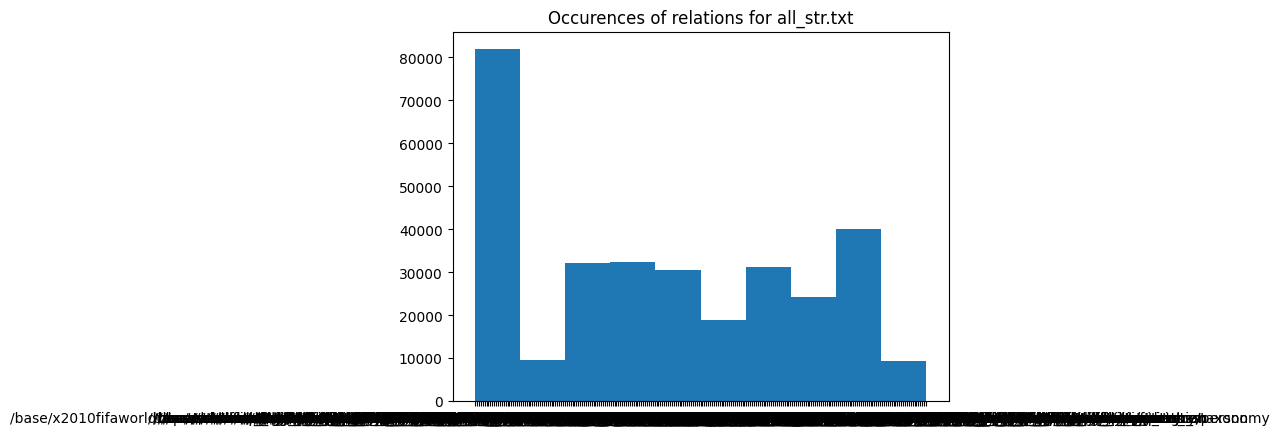

In [15]:
import matplotlib.pyplot as plt
def count_rels(filename, plot=False): 
    """counts occurrence of relations and plots it as histogram """
    _triples = open(filename).readlines()
    edge_index, edge_type = [], []
    for line in _triples:
        head, relation, tail = line.split('\t')
        if tail.endswith('\n'):
            tail = tail[:-1]
        edge_index.append([int(head), int(tail)])
        edge_type.append(relation)
    
    print(f'Count occurrences of relations in {filename}:')
    val, cnt = [], []
    for v in sorted(set(edge_type)):
        print(f'{v}, {edge_type.count(v)}')
        val.append(v)
        cnt.append(edge_type.count(v))
    if plot:
        plt.hist(val, weights=cnt)
        plt.title(f'Occurences of relations for {filename}')
    print(f'\nNumber of triples in {filename}: {len(_triples)}\n\n')

count_rels('all.txt', plot=True)

In [16]:
count_rels('train.txt', plot=False)

Count occurrences of relations in train_str.txt:
/american_football/football_team/current_roster./sports/sports_team_roster/position, 573
/award/award_category/category_of, 148
/award/award_category/disciplines_or_subjects, 204
/award/award_category/nominees./award/award_nomination/nominated_for, 9465
/award/award_category/winners./award/award_honor/award_winner, 5673
/award/award_category/winners./award/award_honor/ceremony, 2834
/award/award_ceremony/awards_presented./award/award_honor/award_winner, 2727
/award/award_ceremony/awards_presented./award/award_honor/honored_for, 909
/award/award_nominated_work/award_nominations./award/award_nomination/nominated_for, 717
/award/award_nominee/award_nominations./award/award_nomination/award, 12157
/award/award_nominee/award_nominations./award/award_nomination/award_nominee, 15989
/award/award_nominee/award_nominations./award/award_nomination/nominated_for, 6277
/award/award_winner/awards_won./award/award_honor/award_winner, 8423
/award/award

In [17]:
count_rels('valid.txt', plot=False)

Count occurrences of relations in valid_str.txt:
/american_football/football_team/current_roster./sports/sports_team_roster/position, 1
/award/award_category/category_of, 13
/award/award_category/disciplines_or_subjects, 21
/award/award_category/nominees./award/award_nomination/nominated_for, 746
/award/award_category/winners./award/award_honor/award_winner, 180
/award/award_category/winners./award/award_honor/ceremony, 283
/award/award_ceremony/awards_presented./award/award_honor/award_winner, 293
/award/award_ceremony/awards_presented./award/award_honor/honored_for, 114
/award/award_nominated_work/award_nominations./award/award_nomination/nominated_for, 12
/award/award_nominee/award_nominations./award/award_nomination/award, 827
/award/award_nominee/award_nominations./award/award_nomination/award_nominee, 188
/award/award_nominee/award_nominations./award/award_nomination/nominated_for, 74
/award/award_winner/awards_won./award/award_honor/award_winner, 27
/award/award_winning_work/awa

In [18]:
count_rels('test.txt', plot=False)

Count occurrences of relations in test_str.txt:
/award/award_category/category_of, 20
/award/award_category/disciplines_or_subjects, 15
/award/award_category/nominees./award/award_nomination/nominated_for, 858
/award/award_category/winners./award/award_honor/award_winner, 217
/award/award_category/winners./award/award_honor/ceremony, 323
/award/award_ceremony/awards_presented./award/award_honor/award_winner, 317
/award/award_ceremony/awards_presented./award/award_honor/honored_for, 121
/award/award_nominated_work/award_nominations./award/award_nomination/nominated_for, 16
/award/award_nominee/award_nominations./award/award_nomination/award, 1067
/award/award_nominee/award_nominations./award/award_nomination/award_nominee, 214
/award/award_nominee/award_nominations./award/award_nomination/nominated_for, 132
/award/award_winner/awards_won./award/award_honor/award_winner, 41
/award/award_winning_work/awards_won./award/award_honor/award, 118
/award/award_winning_work/awards_won./award/awar

# One-to-many relations ?

In [19]:
for i, rel in enumerate(all_triples.relation_to_id.keys()):    
    idx= all_triples.mapped_triples[:, 1] == all_triples.relation_to_id[rel]
    _triples = all_triples.mapped_triples[idx]
    m_heads = _triples[:, 0]
    m_tails = _triples[:, 2]
    unique_heads = torch.unique(m_heads)
    print('\n')
    print(f"{i}. Relation <{rel}>")
    print(f"Number of unique heads with relation <{rel}> : {len(unique_heads)}")
    unique_tails = torch.unique(m_tails)
    print(f"Number of unique heads with relation <{rel}> : {len(unique_tails)}")
    heads = {}
    tails = {}
    for head in unique_heads:
        heads[head.item()] = len(_triples[_triples[:, 0] == head])
    for tail in unique_tails:
        tails[tail.item()] = len(_triples[_triples[:, 2] == tail])
    print("################################# Heads #################################")
    print(f"(head, <{rel}>, tail) - One head has minimum {min(heads.values())} different tails")
    print(f"(head, <{rel}>, tail) - One head has in average {sum(heads.values())/len(heads.values())} different tails")
    print(f"(head, <{rel}>, tail) - One head has median {np.median(list(heads.values()))} different tails")
    print(f"(head, <{rel}>, tail) - One head has maximum {max(heads.values())} different tails")
    print("################################# Heads #################################")
    print(f"(head, <{rel}>, tail) - One head has minimum {min(tails.values())} different heads")
    print(f"(head, <{rel}>, tail) - One head has in average {sum(tails.values())/len(tails.values())} different heads")
    print(f"(head, <{rel}>, tail) - One head has median {np.median(list(tails.values()))} different heads")
    print(f"(head, <{rel}>, tail) - One head has maximum {max(tails.values())} different heads")
    



0. Relation </american_football/football_team/current_roster./sports/sports_team_roster/position>
Number of unique heads with relation </american_football/football_team/current_roster./sports/sports_team_roster/position> : 65
Number of unique heads with relation </american_football/football_team/current_roster./sports/sports_team_roster/position> : 16
################################# Heads #################################
(head, </american_football/football_team/current_roster./sports/sports_team_roster/position>, tail) - One head has minimum 1 different tails
(head, </american_football/football_team/current_roster./sports/sports_team_roster/position>, tail) - One head has in average 8.830769230769231 different tails
(head, </american_football/football_team/current_roster./sports/sports_team_roster/position>, tail) - One head has median 9.0 different tails
(head, </american_football/football_team/current_roster./sports/sports_team_roster/position>, tail) - One head has maximum 13 d


## We can summarize on the relations: 

### Aunt: many-to-many
> a person can have several aunts
a person can be aunt for several other people
theoretically and empirially 

### Brother: many-to-many
> a person can have several brothers
a person can be brother for several people. 
theoretically and empirically 

### Daughter: many-to-two
> a person can have several daughters
a person can be daughter for maximum two people

### Father: one-to-many relation
> a person has only one father
a person can be father for several people

### Husband: one-to-one
> a person can have one husband
a person can be husband for one person
(some empirical exceptions in data)

### Mother: one-to-many relation
> a person has only one mother
a person an be mother for several people

### Nephew : many-to-many 
> a person can have several nephews
a person can be nephew to several

### Niece: many-to-many 
> a person can have several nieces
a person can be niece to several

### Sister: many-to-many
> a person can have several sisters
a person can be sister to several

### Son: many-to-two
> a person can have several sons
a person can be the son of only two people 

### Uncle: many-to-many
> a person can have several uncles
a person can be uncle to several people

### Wife: one-to-one
> a person can have one wife
a person can be the wife of several people
(some exceptions in the data) 

The relations are read as follows : Aunt(x,y) = x is aunt of y. Aunt = "isAuntOf"
